# Eisenverarbeitung

* [Befunde](#Befunde)
* Funde
    * [Kartierung der Schlacken im Arbeitsgebiet](#Kartierung-der-Schlacken-im-Arbeitsgebiet)
    * [Eisenverhüttung in Munda - Schlacken](#Eisenverhüttung-in-Munda---Schlacken)
        * [Untersuchungen durch G. Gassmann 2003](#Untersuchungen-durch-G.-Gassmann-2003)
    * [Proben in Qatar](#Proben-in-Qatar)

In [1]:
%matplotlib inline
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
from mpl_toolkits.axes_grid1 import make_axes_locatable

# pd.options.display.mpl_style = 'default'

con = sqlite3.connect("../data/CongoDB.sqlite")

## Befunde

In [45]:
df = pd.read_csv('../data/base/Eisen_OfenTyp.csv', decimal = ',')
df

,site,feature,y_lat,x_long,TYP,TYP_long,kaBP,lit,Dm_m,T_m
0,Pikunda,PIK 87/3,0.549344,16.635736,Flacher Ofen mit Schlackegrube,Wanne mit seitl Schlackenabfluss,0.84,NaN,1.20,0.00
1,Munda,MUN 87/1,1.162608,17.356948,Flacher Ofen mit Schlackegrube,NaN,0.99,NaN,0.65,0.40
2,Munda,MUN 87/2-1-1,1.162608,17.356948,Grubenofen,NaN,1.93,NaN,1.00,0.80
3,Munda,MUN 87/3,1.162608,17.356948,Flacher Ofen,NaN,1.67,NaN,0.90,0.00
4,Iyonda,IYO 15/48,-0.037076,18.184492,Flacher Ofen mit Schlackegrube,NaN,1.75,NaN,NaN,NaN
5,Bamanya,BAM 83/1,0.009790,18.316297,Flacher Ofen mit Schlackegrube,NaN,0.15,NaN,0.70,0.30
6,Kisangani/Madi,NaN,3.762430,26.887877,Flacher Ofen mit Schlackegrube,NaN,0.15,NaN,0.75,0.00
7,Kabuye/Gisangara,NaN,1.383330,32.416670,Flacher Ofen,NaN,0.15,NaN,NaN,NaN
8,Sabele,I,3.334174,16.188058,Grubenofen,tiefe Grube,0.70,NaN,1.50,1.25
9,Oboui,NaN,6.050000,15.330000,?,NaN,2.50,NaN,NaN,NaN


In [55]:
x = df['Dm_m']
y = df['T_m']
c = df['TYP']
s = (df['kaBP'] * 1000)
plt.scatter(x, y, s, alpha = .5)
plt.gca().invert_yaxis()

> weiter in <code>R/ggplot</code>

## Kartierung der Schlacken im Arbeitsgebiet

In [2]:
sql = """SELECT
            t_Obj.objID,
            t_Obj.ortID,
           't_Ort'.'ort_name' || ' (Fpl. ' || 't_ort'.'Kat-Nr' || ')' AS Ort,
            t_Obj.komplexID,
            t_Obj.Komplex,
            t_Obj.Individuum,
            t_Obj.Art,
            t_Obj.Schlacke_Typ,
            t_Obj.Anzahl,
            t_Obj.Gewicht,
            t_Ort.y_lat,
            t_Ort.x_long
        FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
            INNER JOIN t_Obj ON (t_Ort.ortID = t_Obj.ortID)
            AND (t_Komplex.komplexID = t_Obj.komplexID)
        WHERE (((t_Obj.Art) Like '%Schlacke%'
            Or (t_Obj.Art) = 'S'))""".replace('\n',' ')

df = pd.read_sql(sql, con)
display(df.head())

,objID,ortID,Ort,komplexID,Komplex,Individuum,Art,Schlacke_Typ,Anzahl,Gewicht,y_lat,x_long
0,2,138,Bamanya (Fpl. 12),246,81/1,None,Schlacke,None,1,381,0.00979,18.316297
1,3,138,Bamanya (Fpl. 12),8,83/2,-1,Schlacke,None,2,380,0.00979,18.316297
2,4,138,Bamanya (Fpl. 12),8,83/2,-4,Schlacke,None,2,264,0.00979,18.316297
3,6,138,Bamanya (Fpl. 12),8,83/2,None,Schlacke,None,1,632,0.00979,18.316297
4,7,138,Bamanya (Fpl. 12),8,83/2,None,Schlacke,None,3,1465,0.00979,18.316297


die Spalten mit den Koordinaten und dem Gewicht müssen konvertiert werden:

In [3]:
df['y_lat'] = df['y_lat'].convert_objects(convert_numeric=True)
df['x_long'] = df['x_long'].convert_objects(convert_numeric=True)
df['Gewicht'] = df['Gewicht'].convert_objects(convert_numeric=True)

C:\Users\DirkSeidenticker\Anaconda3\lib\site-packages\IPython\kernel\__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':
C:\Users\DirkSeidenticker\Anaconda3\lib\site-packages\IPython\kernel\__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from IPython.kernel.zmq import kernelapp as app
C:\Users\DirkSeidenticker\Anaconda3\lib\site-packages\IPython\kernel\__main__.py:3: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  app.launch_new_instance()


In [4]:
df_pivot = df.pivot_table(values = 'Gewicht', index = ['Ort', 'x_long', 'y_lat'], aggfunc = sum)
df_pivot = pd.DataFrame(df_pivot)
# den von Pandas angelegten Mulit-Index auflösen
df_pivot = df_pivot.reset_index()
df_pivot['Gewicht [kg]'] = df_pivot['Gewicht'] / 1000
df_pivot = df_pivot.sort_index(by=['Gewicht'], ascending=[True])
# display(df_pivot.head())
# als CSV Zwischenspeichern um in R/ggmap kartiert zu werden
df_pivot.to_csv('../data/processed/Schlacke - Kartierung - Gewicht.csv', index = False, encoding='utf-8')
df_pivot

C:\Users\DirkSeidenticker\Anaconda3\lib\site-packages\IPython\kernel\__main__.py:6: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


,Ort,x_long,y_lat,Gewicht,Gewicht [kg]
15,Motenge-Boma (Fpl. 206),18.648645,3.244495,24,0.024
10,Leme (Fpl. 269),16.112376,1.880963,63,0.063
25,Yengo (Fpl. 282),15.536524,1.959528,66,0.066
4,Boduna (Fpl. 225),19.741706,5.108300,68,0.068
7,Dokeve 2 (Fpl. 224),19.523072,5.131210,68,0.068
8,Ifondo (Fpl. 253),16.908795,0.481301,83,0.083
6,Botwale (Fpl. 286),17.365479,-0.552494,87,0.087
3,Bobusa (Fpl. 239),16.917098,-1.052349,92,0.092
13,Molanda (Fpl. 258),16.537896,0.945646,131,0.131
2,Bili (Fpl. 254),16.901200,0.511441,133,0.133


> ** Kartierung in R/ggmap**

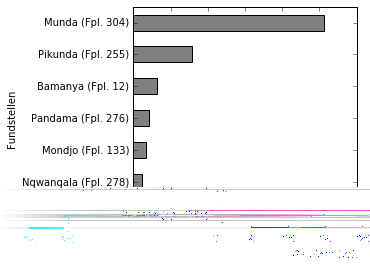

In [5]:
ax = df_pivot[df_pivot['Gewicht [kg]'] > 1].plot(x = 'Ort', y = 'Gewicht [kg]', kind = 'barh', legend=False, color = 'grey')
plt.ylabel('Fundstellen')
plt.xlabel('Gewicht [kg]')
xlim = ax.get_xlim()
ylim = ax.get_ylim()
plt.gca().set_aspect((abs(xlim[0]) + abs(xlim[1])) / (abs(ylim[0]) + abs(ylim[1])))
plt.savefig('../output/figs/7_Eisenprod_GewSchlacken.pdf', bbox_inches='tight')
plt.show()

> **Eisenverhüttung** Verteilung von Schlacken im Arbeitsgebiet

Gesamtgewicht der aufgenommenen Schlacken:

In [6]:
df_pivot['Gewicht [kg]'].sum()

45.730000000000004

Anzahl Fundstellen:

In [7]:
len(df_pivot['Ort'])

26

In [8]:
df_pivot = df.pivot_table(values = 'Gewicht', index = ['Schlacke_Typ'], aggfunc = sum)
df_pivot = pd.DataFrame(df_pivot)
df_pivot = df_pivot.reset_index()
df_pivot['Gewicht [kg]'] = df_pivot['Gewicht'] / 1000
df_pivot = df_pivot.sort_index(by=['Gewicht'], ascending=[True])
# Zeile mit Werten für Schlacken ohne Typ-Zuweisung löschen
df_pivot = df_pivot[df_pivot['Schlacke_Typ'] != '']
display(df_pivot.head())

C:\Users\DirkSeidenticker\Anaconda3\lib\site-packages\IPython\kernel\__main__.py:5: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


,Schlacke_Typ,Gewicht,Gewicht [kg]
9,4,87,0.087
3,1a/3,254,0.254
2,1a,506,0.506
12,5,669,0.669
4,1b,976,0.976


In [9]:
ax = df_pivot.plot(x = 'Schlacke_Typ', y = 'Gewicht [kg]', kind = 'barh', legend=False, color = 'grey')
plt.ylabel('Schlacketyp')
plt.xlabel('Gewicht [kg]')
xlim = ax.get_xlim()
ylim = ax.get_ylim()
plt.gca().set_aspect((abs(xlim[0]) + abs(xlim[1])) / (abs(ylim[0]) + abs(ylim[1])))
plt.savefig('../output/figs/7_Eisenprod_GewSchlacken_Typen.pdf', bbox_inches='tight')
plt.show()

## Schlacken aus Munda

In [23]:
sql = """SELECT
            t_Obj.objID,
            t_Obj.ortID,
            t_Obj.ort_kurz || ' ' || t_Obj.Komplex AS KOMPLEX,
            t_Obj.komplexID,
            t_Obj.Individuum,
            t_Obj.Art,
            t_Obj.Anzahl,
            t_Obj.Gewicht,
            t_Obj.Schlacke_Typ
        FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
            INNER JOIN t_Obj ON (t_Ort.ortID = t_Obj.ortID)
            AND (t_Komplex.komplexID = t_Obj.komplexID)
        WHERE (((t_Obj.Art) Like '%Schlacke%')
            AND ((t_Komplex.bef_art) Not Like '%Ober%')
            AND ((t_Obj.Schlacke_Typ) != '')
            AND ((t_Obj.ort_kurz) = 'MUN'))""".replace('\n',' ')

df = pd.read_sql(sql, con)
display(df.head())

,objID,ortID,KOMPLEX,komplexID,Individuum,Art,Anzahl,Gewicht,Schlacke_Typ
0,331,30,MUN 87/1-0-1,152,None,Schlacke,5,229,6
1,432,30,MUN 87/3/II,155,-3-1,Schlacke,2,71,5
2,433,30,MUN 87/3/II,155,-3-1,Schlacke,19,66,5
3,855,30,MUN 87/1-0-1,152,,Schlacke,7,20,2b
4,856,30,MUN 87/1-0-1,152,,Schlacke,1,1669,2b


In [11]:
df_pivot = df.pivot_table(values = 'Gewicht', index = 'KOMPLEX', columns = 'Schlacke_Typ', aggfunc = sum, fill_value = 0)
df_pivot = pd.DataFrame(df_pivot)
#df_pivot = df_pivot.sort_index(by=['Gewicht'], ascending=[False])
df_pivot

Schlacke_Typ,1a,2a,2b,4,4a,4b,5,6
KOMPLEX,,,,,,,,
MUN 87/1-0-1,1,279,5563,87,342,557,0,229
MUN 87/1-0-2,0,42,101,0,274,92,0,0
MUN 87/2-1-1,0,1371,1345,0,3387,276,7,477
MUN 87/3/I,2,7,0,0,0,0,149,0
MUN 87/3/II,0,52,2340,0,0,541,322,734


In [12]:
# Diagramm auf 100% - Prozentwerte für jede Zeile ausrechnen:
df_perc = df_pivot.divide(df_pivot.sum(axis=1), axis=0)
df_perc = df_perc * 100
df_perc

Schlacke_Typ,1a,2a,2b,4,4a,4b,5,6
KOMPLEX,,,,,,,,
MUN 87/1-0-1,0.014168,3.952961,78.818362,1.232644,4.845565,7.891754,0.000000,3.244545
MUN 87/1-0-2,0.000000,8.251473,19.842829,0.000000,53.831041,18.074656,0.000000,0.000000
MUN 87/2-1-1,0.000000,19.976687,19.597844,0.000000,49.351596,4.021565,0.101996,6.950313
MUN 87/3/I,1.265823,4.430380,0.000000,0.000000,0.000000,0.000000,94.303797,0.000000
MUN 87/3/II,0.000000,1.303585,58.661319,0.000000,0.000000,13.562296,8.072199,18.400602


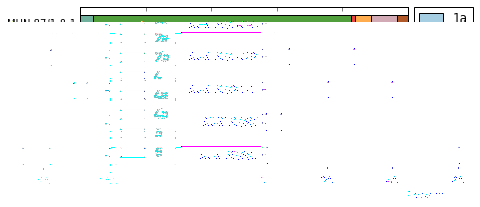

In [13]:
ax = df_perc.plot(kind = 'barh', stacked=True, cmap = 'Paired')
plt.xlabel('Prozent')
plt.ylabel('')
plt.xlim([0,100]) 
plt.legend(loc = 4)
lgd = plt.legend(bbox_to_anchor=(1.02, 1), loc = 2, borderaxespad = 0.)
plt.tight_layout()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
plt.gca().set_aspect((abs(xlim[0]) + abs(xlim[1])) / (2*(abs(ylim[0]) + abs(ylim[1]))))
plt.gca().invert_yaxis()
plt.savefig('../output/figs/7_MUN_SchlackenTypen-Prozent.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

In [14]:
sql = """SELECT
            t_Obj.objID,
            t_Obj.Komplex,
            t_Obj.Individuum,
            t_Obj.Anzahl,
            t_Obj.Schlacke_Typ,
            t_Obj.Gewicht
        FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
            INNER JOIN t_Obj ON (t_Ort.ortID = t_Obj.ortID)
            AND (t_Komplex.komplexID = t_Obj.komplexID)
        WHERE (((t_Ort.ort_kurz) = 'MUN')
            AND ((t_Obj.Art) Like '%Schlacke%')
            OR ((t_Obj.Art)='S'))""".replace('\n',' ')

df = pd.read_sql(sql, con)
display(df.head())

,objID,Komplex,Individuum,Anzahl,Schlacke_Typ,Gewicht
0,330,87/1-0-1,None,1,None,92
1,331,87/1-0-1,None,5,6,229
2,350,87/2-1-1,None,5,None,120
3,351,87/2-1-1,None,1,None,440
4,432,87/3/II,-3-1,2,5,71


In [15]:
df_pivot = df.pivot_table(values = 'Gewicht', index = 'Komplex', aggfunc = sum)
df_pivot = pd.DataFrame(df_pivot)
df_pivot = df_pivot.sort_index(by=['Gewicht'], ascending=[False])
df_pivot

C:\Users\DirkSeidenticker\Anaconda3\lib\site-packages\IPython\kernel\__main__.py:3: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  app.launch_new_instance()


,Gewicht
Komplex,
87/2-1-1,7579
87/1-0-1,7150
87/3,6200
87/3/II,3989
87/1-0-2,509
87/3/I,158


In [16]:
df_pivot['Gewicht'].sum()

25585

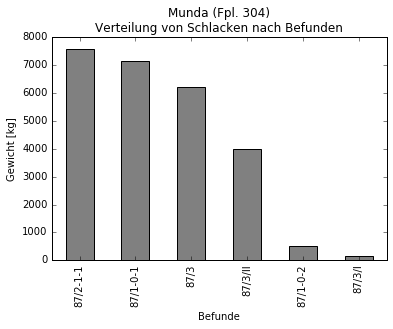

In [17]:
df_pivot.plot(y = 'Gewicht', kind = 'bar', legend=False, color = 'grey')
plt.xlabel('Befunde')
plt.ylabel('Gewicht [kg]')
plt.title('Munda (Fpl. 304)\nVerteilung von Schlacken nach Befunden')
plt.savefig('../output/figs/7_Eisenprod_MUN87_Schlacken.pdf', bbox_inches='tight')
plt.show()

Aufgeschlüsselt nach Schlacke-Typen:

In [18]:
df_pivot = df.pivot_table(values = 'Gewicht', index = 'Komplex', columns = 'Schlacke_Typ', aggfunc = sum)
df_pivot = pd.DataFrame(df_pivot)

# Spalte mit leeren-Werten löschen
df_pivot = df_pivot.drop('', 1)

# Prozente bezogen auf die Summe der Zeilen-Summen (also insgesamt)
df_pivot = df_pivot.apply(lambda c: c / df_pivot.sum().sum() * 100, axis=1)

# df_pivot = df_pivot.sort_index(by=['Gewicht'], ascending=[False])
df_pivot

Schlacke_Typ,1a,2a,2b,4,4a,4b,5,6
Komplex,,,,,,,,
87/1-0-1,0.005383,1.501857,29.945632,0.468321,1.840986,2.998331,NaN,1.232707
87/1-0-2,NaN,0.226086,0.543683,NaN,1.474942,0.495236,NaN,NaN
87/2-1-1,NaN,7.380094,7.240136,NaN,18.232223,1.485708,0.037681,2.567691
87/3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87/3/I,0.010766,0.037681,NaN,NaN,NaN,NaN,0.802067,NaN
87/3/II,NaN,0.279916,12.596221,NaN,NaN,2.912203,1.733326,3.951122


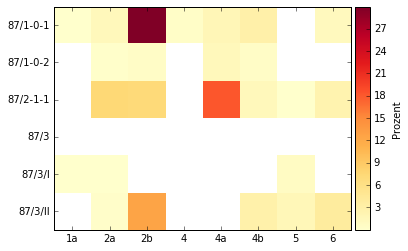

In [19]:
ax = plt.gca()

im = plt.imshow(df_pivot, interpolation='nearest', cmap='YlOrRd')
plt.yticks(range(len(df_pivot.index)), df_pivot.index)
plt.xticks(range(len(df_pivot.columns)), df_pivot.columns)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(im, cax=cax)
cbar.set_label('Prozent')

plt.show()

## Untersuchungen durch G. Gassmann 2003

In [3]:
df_spe = pd.read_csv("../data/base/MUN87_Gassmann2003_Elemente.csv", encoding = 'Latin1', decimal = ',')
df_env = pd.read_csv("../data/base/MUN87_Gassmann2003_Proben.csv", encoding = 'Latin1')

### Haupt- und Spurenelemente:

In [4]:
df_spe

,Probe,SiO2,TiO2,Al2O3,Fe2O3,MnO,MgO,CaO,Na2O,P2O5,...,Pb,As,Sb,Bi,Sn,Cr,V,Co,Ag,Fe
0,D-84/00-1,39.5,1.25,17.30,44.9,0.04,0.24,0.45,0.04,0.51,...,0,0,0.003,0.035,0,0.036,0.059,0.001,0.027,31.4
1,D-84/00-2,28.0,0.57,7.40,63.7,0.03,0.43,0.65,0.00,1.45,...,0,0,0.000,0.011,0,0.011,0.032,0.000,0.013,44.5
2,D-84/00-3,40.3,1.01,17.30,40.9,0.01,0.13,0.11,0.04,0.42,...,0,0,0.003,0.120,0,0.120,0.065,0.000,0.018,28.6
3,D-84/00-4,25.4,0.76,7.81,67.8,0.09,0.25,0.68,0.01,0.60,...,0,0,0.000,0.003,0,0.003,0.016,0.000,0.006,47.4
4,D-84/00-5,42.2,1.10,17.80,44.3,0.02,0.25,0.37,0.03,0.54,...,0,0,0.002,0.028,0,0.028,0.060,0.000,0.007,31.0
5,D-84/00-6,33.8,0.76,10.50,59.3,0.04,0.65,1.09,0.01,1.72,...,0,0,0.000,0.011,0,0.011,0.030,0.000,0.017,41.5


> Plot der Hauptselemnte SiO2 vs Fe2o3 in R

### Daten zu den Proben:

In [5]:
df_env

,Probe,Komplex,Tiefe,Typ,Typ_Gassmann,Beschreibung
0,D-84/00-1,MUN 87/1,0,1/2,I,Diffuse Fließschlacke mit oberflächlichen Holz...
1,D-84/00-2,MUN 87/1-0-2-4,"0,7",3/4,II,Kompakte Schlacke mit leichten Rostanflügen
2,D-84/00-3,MUN 87/2-1-1-3,NaN,1/2,I,Poröse Ofenschlacke mit vielen Holzkohleeinsch...
3,D-84/00-4,MUN 87/2-1-1-3,NaN,3/4,II,Kleine kompakte Fließschlacke
4,D-84/00-5,MUN 87/2-1-1-7,NaN,1/2,I,Blasige größere Fließtropfenschlacke aus basal...
5,D-84/00-6,MUN 87/3-3-1,NaN,5,B,Kalottenartige Schlacke in Lagen mit Wechsel m...


## Proben in Qatar

Im Sommer 2012 habe ich Proben zur Untersuchung zu Jane Humphris nach Qatar geschickt.

In [23]:
sql = """SELECT
            t_Obj.objID,
           't_Ort'.'ort_name' || ' (Fpl. ' || 't_ort'.'Kat-Nr' || ')' AS Ort,
            t_Ort.ortID,
            t_Komplex.komplexID,
            t_Komplex.bef_nr,
            t_Obj.Komplex,
            t_Komplex.bef_art,
            t_Obj.Individuum,
            t_Obj.Anzahl,
            t_Obj.Art,
            t_Obj.Schlacke_Typ,
            t_Obj.Gewicht
        FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
            INNER JOIN t_Obj ON (t_Ort.ortID = t_Obj.ortID)
            AND (t_Komplex.komplexID = t_Obj.komplexID)
        WHERE (((t_Obj.Karton) Like '%Qatar%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)
# display(df.head())

In [24]:
print("Proben in Qatar: ", df['Gewicht'].sum() / 1000, " kg")

Proben in Qatar:  9.498  kg


In [25]:
df_pivot = df.pivot_table(values = 'objID', index = ['Ort', 'bef_nr'], columns = 'Art', aggfunc = len)
df_pivot

Art                                       Laterit  Schlacke  Tuyere
Ort                             bef_nr                             
Bamanya (Fpl. 12)               81/1            1         1     NaN
                                83/2          NaN         4       1
Baringa (Fpl. 161)              85/101        NaN         1       1
Maoko (Fpl. 207)                85/101        NaN         1       1
Motenge-Boma (Fpl. 206)         85/101        NaN       NaN       3
Munda (Fpl. 304)                87/1          NaN         3     NaN
                                87/2-1-1      NaN         2     NaN
                                87/3          NaN         2     NaN
Ngoko Fkm 17 (Elali) (Fpl. 275) 87/101        NaN         1     NaN
Pandama (Fpl. 276)              87/101        NaN         1     NaN
Pikunda (Fpl. 255)              87/3          NaN         3     NaN

In [26]:
df

,objID,Ort,ortID,komplexID,bef_nr,Komplex,bef_art,Individuum,Anzahl,Art,Schlacke_Typ,Gewicht
0,1,Bamanya (Fpl. 12),138,246,81/1,81/1,None,None,1,Laterit,None,274
1,2,Bamanya (Fpl. 12),138,246,81/1,81/1,None,None,1,Schlacke,None,381
2,3,Bamanya (Fpl. 12),138,8,83/2,83/2,None,-1,2,Schlacke,None,380
3,4,Bamanya (Fpl. 12),138,8,83/2,83/2,None,-4,2,Schlacke,None,264
4,5,Bamanya (Fpl. 12),138,8,83/2,83/2,None,Bef. 1,1,Tuyere,None,717
5,6,Bamanya (Fpl. 12),138,8,83/2,83/2,None,None,1,Schlacke,None,632
6,7,Bamanya (Fpl. 12),138,8,83/2,83/2,None,None,3,Schlacke,None,1465
7,8,Baringa (Fpl. 161),37,10,85/101,85/101,Oberfl,None,1,Schlacke,None,231
8,9,Baringa (Fpl. 161),37,10,85/101,85/101,Oberfl,None,1,Tuyere,None,63
9,219,Maoko (Fpl. 207),112,106,85/101,85/101,Oberfl,None,1,Tuyere,None,108


# Analysen
siehe R-Code

In [26]:
df = pd.read_csv("../data/processed/7_Schlacken_Spe_alle.csv")
df = df.rename(columns = {'Sample': 'Probe', 
                          'SiO2': 'SiO$^{2}$', 
                          'Al2O3': 'Al$^{2}$O$^{3}$', 
                          'Type': 'Typ', 
                          'Analysis': 'Analyse'})
df = df.iloc[:, 1:7]
df.to_latex("../output/tabs/7_Schlacken_Spe_alle.tex", 
            index = False, escape = False, decimal = ',')
df

,Probe,FeO,SiO$^{2}$,Al$^{2}$O$^{3}$,Typ,Analyse
0,D-84/00-1,44.90,39.50,17.30,1/2,Gassmann 2003
1,D-84/00-3,40.90,40.30,17.30,1/2,Gassmann 2003
2,D-84/00-5,44.30,42.20,17.80,1/2,Gassmann 2003
3,MUN 87/1-S-1,45.23,36.75,14.62,1/2,Humphris/Nordland 2016
4,PIK 87/3-S-1,47.65,38.31,11.68,1/2,Humphris/Nordland 2016
5,D-84/00-2,63.70,28.00,7.40,3/4,Gassmann 2003
6,D-84/00-4,67.80,25.40,7.81,3/4,Gassmann 2003
7,D-84/00-6,59.30,33.80,10.50,5,Gassmann 2003
8,NGK 87/017-S-1,70.46,23.88,3.68,6,Humphris/Nordland 2016
9,PDM 87/101-S-1,75.45,15.05,4.68,6,Humphris/Nordland 2016
